# Step 0: Import and Explore

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pickle


%matplotlib inline

In [3]:
df = pd.read_csv('final_internship_data.csv')
print("Dataset shape: ", df.shape)
df.head()

Dataset shape:  (500000, 26)


,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [4]:
# summary for numerical values
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358361,-1.265712,0.696740,-1.265755,0.696675,1.683428,13.510834,15.684206,6.268650,3.042008,2011.739132,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916617,0.206941,0.140909,0.205903,0.128997,1.307395,6.511571,8.681066,3.437815,1.949240,1.860889,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [5]:
# summary for categorical values
df.describe(include=['object'])

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,pickup_datetime
count,500000,500000,500000,500000,500000,500000,500000,500000
unique,500000,221675,221700,4,5,3,500000,461206
top,KHVrEVlD,Michael Smith,Michael Smith,Very Good,sunny,Congested Traffic,2009-06-15 17:26:21.0000001,2012-01-26 21:22:00
freq,1,224,257,125312,100433,166847,1,6


In [6]:
pd.set_option('display.max_columns', None)
df.info()
pd.reset_option('display.max_columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [7]:
df = df.drop(columns=['User ID','User Name','pickup_datetime','key'])   # Features that doesn't add meaning for predecting the output

# Step 1: Data Preprocessing

## 1.1 Data Cleaning

### 1.1.1 Handling missing values

- Criteria: 
    - Determine the percentage of missing values.
- Approach:
    - **<5% Missing**: Impute using mean, median, or mode, or just remove them if they are not a rare class or of important type.
    - **5%-20% Missing**: Consider using more advanced imputation methods (KNN, MICE).
    - **\>20% Missing**: Consider removing the feature or imputing based on domain knowledge.

In [8]:
# Calculate the percentage of null values
null_percentage = (df.isna().sum() / len(df)) * 100

# Print the columns with null values
print("Columns with Null Values:")
for col, perc in null_percentage.items():
    if perc > 0:
        print(f"{col}: {perc:}%")

Columns with Null Values:
dropoff_longitude: 0.001%
dropoff_latitude: 0.001%
jfk_dist: 0.001%
ewr_dist: 0.001%
lga_dist: 0.001%
sol_dist: 0.001%
nyc_dist: 0.001%
distance: 0.001%
bearing: 0.001%


In [9]:
# I will use this syntax after each step for elaboration of each step output (eg. step 1.1.1 -> df_111)
df_111 = df.dropna()

### 1.1.2 Removing Duplicates

- Criteria: 
    - Check for duplicate rows in the dataset.
- Approach:
    - Remove duplicates if they don't provide additional information.

In [10]:
num_duplicates = df_111.duplicated().sum()
num_duplicates      # No Duplicates
df_112 = df_111

### 1.1.3 Handling Outliers:

- Criteria:
   - **Visual inspection** (box plots, histograms) or statistical methods (Z-score, IQR). I will use statisical methods.
- Approach:
   - **Moderate Outliers**: Apply transformations (log, square root).
   - **Extreme Outliers**:  Consider capping or removing them if they distort the model.

C:\Users\youss\AppData\Local\Temp\ipykernel_3728\11043457.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[column], palette='rainbow', orient='h', ax=ax)
C:\Users\youss\AppData\Local\Temp\ipykernel_3728\11043457.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[column], palette='rainbow', orient='h', ax=ax)
C:\Users\youss\AppData\Local\Temp\ipykernel_3728\11043457.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[column], palette='rainbow', orient='h', ax=ax)
C:\Users\youss\AppData\Local\Temp\ipykernel_3728\11043457.py:16:

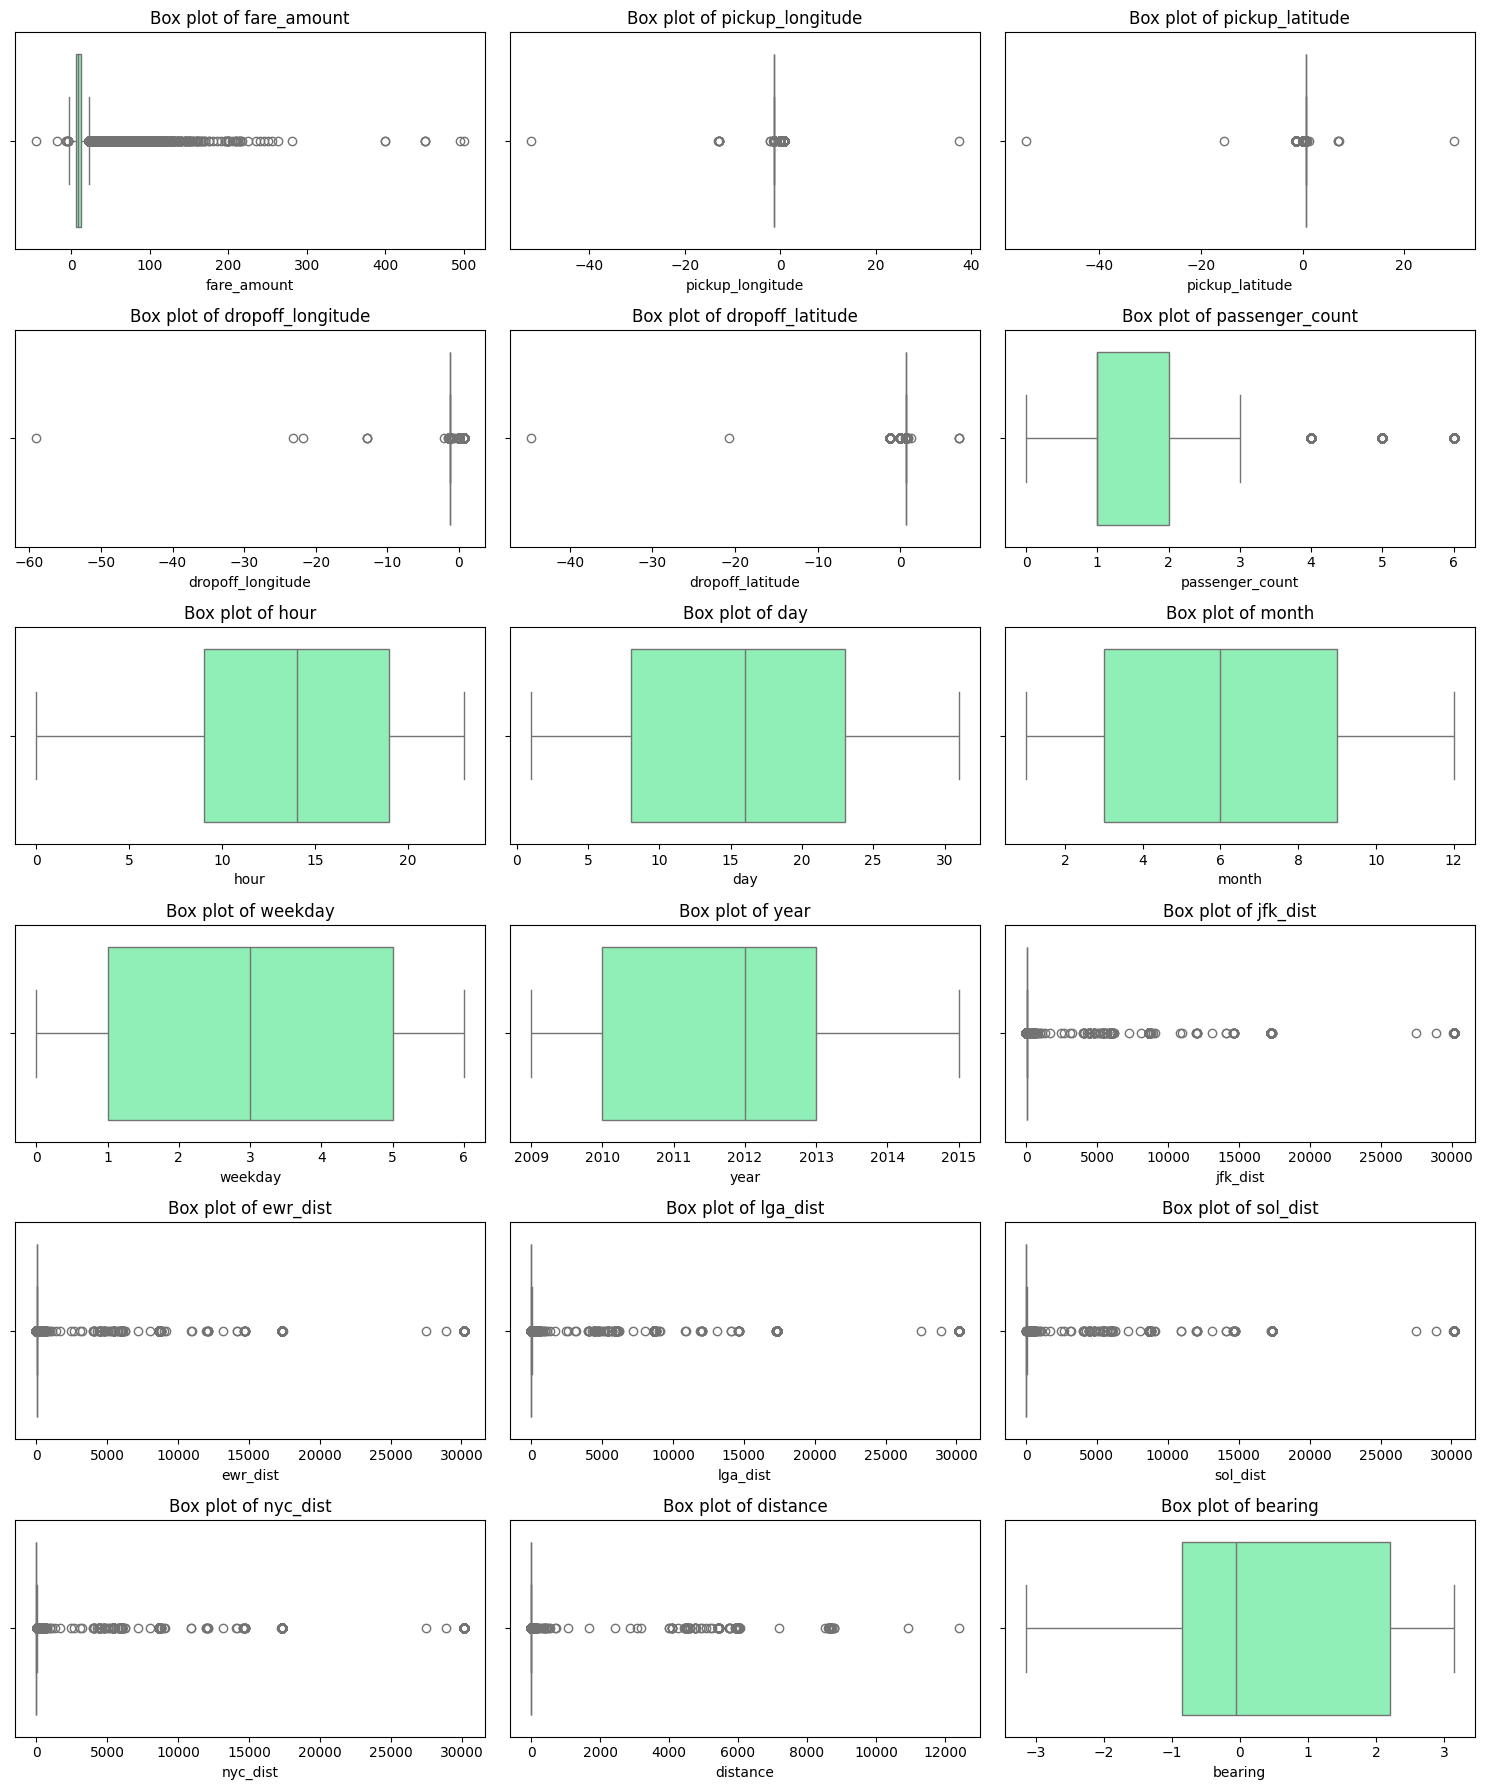

In [11]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Set the number of columns and rows for subplots
num_cols = 3  # Number of plots per row
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

# Create a figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# Iterate through the numerical columns and create a box plot for each
for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]  # Handle 1-row case
    sns.boxplot(df[column], palette='rainbow', orient='h', ax=ax)
    ax.set_title('Box plot of ' + column)

# Remove empty subplots
for j in range(i + 1, num_cols * num_rows):
    fig.delaxes(axes.flatten()[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [12]:
df_11 = df_112      # Output of step 1.1 -> df_11

By looking at these graphs and refering to the nature of the dataset, we don't need to do further handling to outliers.

## 1.2 Encoding Categorical Variables

- Criteria:
    - Determine whether the categories have an ordinal relationship.
- Approach:
    - Ordinal Data: Use Label Encoding.
    - Nominal Data: Use One-Hot Encoding.

In [13]:
from sklearn.preprocessing import LabelEncoder

# Most of our Categorical Features are Ordinal -> Label Encoder
label_encoder = LabelEncoder()
cat_cols = df_11.select_dtypes(include=['object'])
df_12 = df_11
for col in cat_cols:
    df_12[col] = label_encoder.fit_transform(df_11[col])


# Check if all columns are numerical
are_all_numerical = all(df_12.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x)))
print(f"\nAre all columns numerical? {'Yes' if are_all_numerical else 'No'}")


Are all columns numerical? Yes


C:\Users\youss\AppData\Local\Temp\ipykernel_3728\1102954836.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_12[col] = label_encoder.fit_transform(df_11[col])
C:\Users\youss\AppData\Local\Temp\ipykernel_3728\1102954836.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_12[col] = label_encoder.fit_transform(df_11[col])
C:\Users\youss\AppData\Local\Temp\ipykernel_3728\1102954836.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

## 1.3 Feature Engineering

### 1.3.1 Use Feature Selection method

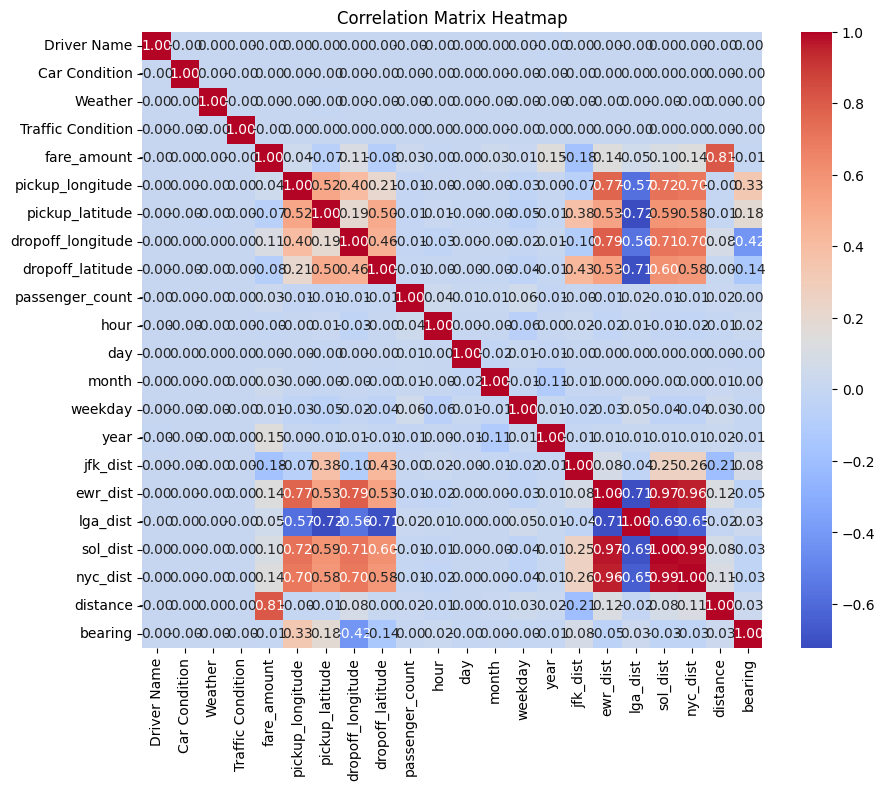

In [14]:
correlation_matrix = df_12.corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

**Based on the Correlation between we can remove some columns that doesn't affect the target**

In [15]:
df_13 = df_12.drop(columns=['Driver Name', 'Car Condition', 'Weather', 'day', 'hour', 'sol_dist'])
df_13.dtypes

Traffic Condition      int32
fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
month                  int64
weekday                int64
year                   int64
jfk_dist             float64
ewr_dist             float64
lga_dist             float64
nyc_dist             float64
distance             float64
bearing              float64
dtype: object

## 1.4 Splitting the Data
- Criteria:
   - Split into train, test and cross-validation(dev-set) sets
- Approach:
    - Use a 60:20:20 or 70:15:15 train-test-cv split.

In [18]:
from sklearn.model_selection import train_test_split

X = df_13.drop(columns='fare_amount').values
y = df_13['fare_amount'].values

X_train, X_, y_train, y_ = train_test_split(X, y, train_size = 0.8)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_, train_size = 0.5)
del(X_,y_)

print("X train shape: ",X_train.shape)
print("y train shape: ",y_train.shape)

print("X CV shape:",X_cv.shape)
print("y CV shape:",y_cv.shape)

print("X test shape:",X_test.shape)
print("y test shape:",y_test.shape)


X train shape:  (399996, 15)
y train shape:  (399996,)
X CV shape: (49999, 15)
y CV shape: (49999,)
X test shape: (50000, 15)
y test shape: (50000,)


**Reducing number of features from 26 -> 15 will reduce the complexity of the modeling step**

## 1.5 Scaling and Normalization

- Criteria:
    - Check for features on different scales.
- Approach:
    - StandardScaler: Use if features are normally distributed.
    - MinMaxScaler: Use if features are not normally distributed or have varying scales.

In [19]:
# We can try Normalization and Scaling out Data and see the impact on our accuracy 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Start by Scaling
standard_scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X_train_scaled = standard_scaler.fit_transform(X_train)

# Transform the test data (using the same scaler)
X_test_scaled = standard_scaler.transform(X_test)

# Extract the scaler object to a pickle file.
with open("scaler.pkl",'wb') as f:
    pickle.dump(standard_scaler,f)


## Try Normalizing
# normalizer = MinMaxScaler()
# Fit the scaler normalizer on the training data and transform it
# X_train_normalized = normalizer.fit_transform(X_train)

# Transform the test data (using the same scaler)
# X_test_normalized = normalizer.transform(X_test)



# Step 2: Model Building

## 2.1 Model Selection

- Criteria:
   - **Data Size**: Smaller datasets may benefit from simpler models like Logistic Regression or Decision Trees. Larger datasets can leverage more complex models like Neural Networks or Gradient Boosting.
   - **Type of Problem**: Classification (Logistic Regression, SVM, Random Forest) vs. Regression (Linear Regression, Decision Trees, Gradient Boosting), however it's not a rule we can user SVR and RandomForestRegressor, and Decision trees for classification, but this is recommended based on my research.

#### ***Linear Regression***

In [20]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled,y_train)

LinearRegression()

In [21]:
with open('model/lr_model','wb') as f:
    pickle.dump(lr_model,f)

In [22]:
with open('model/lr_model','rb') as f:
    lr_model_pickle = pickle.load(f)

#### ***Decision Tree***

In [23]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [24]:
with open("model/decisionTree.pkl","wb") as f:
    pickle.dump(decision_tree,f)


In [25]:
# Load the model from the pickle file, to not re-train the model each time
with open('model/decisionTree.pkl', 'rb') as f:
    decisionTree_pickle = pickle.load(f)

#### ***Random Forest***

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor
rfc = RandomForestRegressor(random_state=42)

# Train the model
rfc.fit(X_train_scaled,y_train)
y_pred = rfc.predict(X_test)

In [27]:
with open('model/randomForest.pkl', 'wb') as f:  # open a text file
    pickle.dump(rfc, f) # serialize the list
    

In [28]:
# Load the model from the pickle file, to not re-train the model each time
with open('model/randomForest.pkl', 'rb') as f:
    randomForest_pickle = pickle.load(f)

#### ***XGBOOST***

In [29]:
from xgboost import XGBRegressor

# Initialize the XGBClassifier
xgb = XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse')
xgb.fit(X_train_scaled,y_train)

c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:36:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [30]:
with open('models/xgboost.pkl','wb') as f:
    pickle.dump(xgb,f)

In [4]:
# Load the model from the file
with open('models/xgboost.pkl', 'rb') as f:
    xgboost_pickle = pickle.load(f)

## 2.2 Model Evaluation

- Criteria:
    - **Choose metrics**: based on the problem type and business needs.
- Approach:
    - **Classification**: we can use accuracy, precision, recall, F1-score, ROC-AUC.
    - **Regression**: Use MSE, MAE, R-squared.

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def model_evaluation_regression(model, X_train, y_train, X_cv, y_cv, X_test, y_test):
    # Evaluate on training data
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = train_mse**0.5
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    print("\n>> Training Evaluation: ")
    print(f"Training MSE: {train_mse}, \nRMSE: {train_rmse}, \nMAE: {train_mae}, \nR²: {train_r2}")
    
    # Evaluate on cross-validation data
    y_cv_pred = model.predict(X_cv)
    cv_mse = mean_squared_error(y_cv, y_cv_pred)
    cv_rmse = cv_mse**0.5
    cv_mae = mean_absolute_error(y_cv, y_cv_pred)
    cv_r2 = r2_score(y_cv, y_cv_pred)
    print("\n>> Cross-Validation Evaluation: ")
    print(f"Cross-Validation MSE: {cv_mse}, \nRMSE: {cv_rmse}, \nMAE: {cv_mae}, \nR²: {cv_r2}")
    
    # Evaluate on test data
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = test_mse**0.5
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    print("\n>> Test Evaluation: ")
    print(f"Test MSE: {test_mse}, \nRMSE: {test_rmse}, \nMAE: {test_mae}, \nR²: {test_r2}")


- List of models we have:
    - lr_model_pickle
    - decisionTree_pickle
    - randomForest_pickle
    - xgboost_pickle
    - nn_model_pickle

#### Linear Regression Evaluation

In [33]:
model_evaluation_regression(lr_model_pickle, X_train_scaled, y_train, X_cv, y_cv, X_test, y_test)


>> Training Evaluation: 
Training MSE: 65.2009017896899, 
RMSE: 8.074707535860968, 
MAE: 4.961604910788016, 
R²: 0.34117495940675535

>> Cross-Validation Evaluation: 
Cross-Validation MSE: 10907931964.455309, 
RMSE: 104441.04540100749, 
MAE: 102844.29689314506, 
R²: -115877796.24976914

>> Test Evaluation: 
Test MSE: 10882738191.076923, 
RMSE: 104320.36326181443, 
MAE: 102663.54439228775, 
R²: -111712119.67193344


#### Decision Tree Evaluation

In [34]:
model_evaluation_regression(decisionTree_pickle, X_train_scaled, y_train, X_cv, y_cv, X_test, y_test)


>> Training Evaluation: 
Training MSE: 1.3835281297895776, 
RMSE: 1.176234725634972, 
MAE: 0.07857421770826666, 
R²: 0.9860200863599919

>> Cross-Validation Evaluation: 
Cross-Validation MSE: 401.7188714654293, 
RMSE: 20.042925721197225, 
MAE: 8.862518450369006, 
R²: -3.2675640158708656

>> Test Evaluation: 
Test MSE: 385.95294009, 
RMSE: 19.64568502470708, 
MAE: 8.972721799999999, 
R²: -2.961835767800915


#### Random Forest Evaluation

In [35]:
model_evaluation_regression(randomForest_pickle, X_train_scaled, y_train, X_cv, y_cv, X_test, y_test)


>> Training Evaluation: 
Training MSE: 4.234099844840696, 
RMSE: 2.057692845115785, 
MAE: 0.7653777425074189, 
R²: 0.9572163739214704

>> Cross-Validation Evaluation: 
Cross-Validation MSE: 7333.807283555007, 
RMSE: 85.63765108616074, 
MAE: 84.22396571531429, 
R²: -76.90894151539601

>> Test Evaluation: 
Test MSE: 7303.3106468045935, 
RMSE: 85.45940935206956, 
MAE: 84.01108020599999, 
R²: -73.9690294809633


#### XGBoost Evaluation

In [36]:
model_evaluation_regression(xgboost_pickle, X_train_scaled, y_train, X_cv, y_cv, X_test, y_test)


>> Training Evaluation: 
Training MSE: 13.7065621555129, 
RMSE: 3.702237452610637, 
MAE: 1.7793731859427604, 
R²: 0.8615015111657927

>> Cross-Validation Evaluation: 
Cross-Validation MSE: 8455.645521454255, 
RMSE: 91.95458401544893, 
MAE: 89.69672593665953, 
R²: -88.82652078724459

>> Test Evaluation: 
Test MSE: 8415.860290653218, 
RMSE: 91.73799807415256, 
MAE: 89.403316144899, 
R²: -85.38943470297252


# Step 3: Hyperparameter Tuning

## 3.1 Techniques

- Criteria:
    - Based on computational resources and time constraints.
- Approach:
    - **Grid Search**: Use for thorough tuning but can be time-consuming.
    - **Random Search**: Faster but less exhaustive.
    - **Bayesian Optimization**: Efficient, especially for complex models.

In [37]:
from sklearn.model_selection import RandomizedSearchCV, KFold

param_grids = {
    'linear_regression': {
        'fit_intercept': [True, False]
    },
    'decision_tree': {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'xgboost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1, 0.3]
    }
}

models = {
    'linear_regression': lr_model_pickle,
    'decision_tree': decisionTree_pickle,
    'xgboost': xgboost_pickle
}

# Use Cross-Validation using KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Randomized Search for each model
best_models = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    random_search = RandomizedSearchCV(model, param_grids[model_name], cv=kf, scoring='r2', verbose=1, n_jobs=-1)
    try:
        random_search.fit(X_train, y_train)
        best_models[model_name] = random_search.best_estimator_
        print(f"Best parameters for {model_name}: {random_search.best_params_}")
        print(f"Best score for {model_name}: {random_search.best_score_}")
    except Exception as e:
        print(f"Failed to tune {model_name}: {e}")

# Evaluate the best model on the validation set
for model_name, best_model in best_models.items():
    y_cv_pred = best_model.predict(X_cv)
    cv_mse = mean_squared_error(y_cv, y_cv_pred)
    cv_r2 = r2_score(y_cv, y_cv_pred)
    print(f"{model_name} MSE on validation set: {cv_mse}")
    print(f"{model_name} R2 on validation set: {cv_r2}")

Tuning linear_regression...
Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for linear_regression: {'fit_intercept': True}
Best score for linear_regression: 0.32676571496243056
Tuning decision_tree...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for decision_tree: {'min_samples_split': 10, 'max_depth': 10}
Best score for decision_tree: 0.7289726939601365
Tuning xgboost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:39:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for xgboost: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.3}
Best score for xgboost: 0.7746957966597247
linear_regression MSE on validation set: 61.938404519206024
linear_regression R2 on validation set: 0.34201222521017616
decision_tree MSE on validation set: 21.289121446411727
decision_tree R2 on validation set: 0.7738401278416667
xgboost MSE on validation set: 17.87294525803152
xgboost R2 on validation set: 0.8101310556744182


As we can see the Linear Regression model gives the least MSE and the best accuracy based on the finetuning stage (3.1) and the model evaluation stage (2.2). 

(**NOTE**) Finetuning the random forest was taking a lot of time, so i ignored it because as we saw in the Model Evaluation step (2.2), it wasn't giving the best score

# Step 4: Showcasing the Best Accuracy

## 4.1 Select the Best Model

- Criteria: Choose the model with the highest performance metric based on cross-validation.
- Approach: Report the performance on the test set and cross-validation scores.

In [38]:
# Assuming best_models dictionary already exists with the best estimators

# Extract the best model
best_model_name = max(best_models, key=lambda k: best_models[k].score(X_cv, y_cv))
best_model = best_models[best_model_name]

# Print the best model's details
print(f"The best model is: {best_model_name}")
print(f"Model details: {best_model}")


The best model is: xgboost
Model details: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


In [39]:
# Extract the best model to a pickle file.
with open("models/best_model.pkl.pkl",'wb') as f:
    pickle.dump(best_model,f)

In [3]:
# Load the best model from the pickle file.
with open("models/best_model.pkl",'rb') as f:
    best_model_pickle = pickle.load(f)

In [41]:
import os

# Define the directory where the models will be saved
save_directory = "finetuned_models"

# Create the directory if it doesn't exist
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Save each model in the best_models dictionary
for model_name, model in best_models.items():
    # Define the file path and name
    file_path = os.path.join(save_directory, f"{model_name}_finetuned.pkl")
    
    # Save the model to the file
    with open(file_path, 'wb') as f:
        pickle.dump(model, f)

    print(f"Saved {model_name} model to {file_path}")


Saved linear_regression model to finetuned_models\linear_regression_finetuned.pkl
Saved decision_tree model to finetuned_models\decision_tree_finetuned.pkl
Saved xgboost model to finetuned_models\xgboost_finetuned.pkl
